In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [38]:
pd.set_option("display.max_columns",None)
sns.set(style="whitegrid",context="talk")

In [39]:
df=pd.read_csv("ecommerce_customer_behavior_dataset.csv")
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [40]:
# Quick Preview
display(df.head())
print("shape:",df.shape)
df.info()
df.describe(include="all").T

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


shape: (5000, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Duration_Minutes  5000 non-null   int

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order_ID,5000,5000,ORD_001337,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,5000,5000,CUST_01337,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,5000,451,2023-07-14,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,5000.0,NaN,NaN,NaN,35.0326,11.080546,18.0,27.0,35.0,42.0,75.0
Gender,5000,3,Female,2492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,5000,10,Istanbul,1284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Category,5000,8,Sports,667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit_Price,5000.0,NaN,NaN,NaN,455.83412,712.477209,5.18,76.5875,182.95,513.93,7159.45
Quantity,5000.0,NaN,NaN,NaN,2.22,1.398711,1.0,1.0,2.0,3.0,5.0
Discount_Amount,5000.0,NaN,NaN,NaN,24.852804,88.385124,0.0,0.0,0.0,8.76,1525.55


### **Data Cleaning and Preparation**

In [51]:
# standardised column names (keep original if you prefer; this makes later code consistent)
df.columns=list(map(lambda col: col.lower(),df.columns))

In [53]:
df=df.rename(columns={
    "date":"order_date",
    "session_duration_minutes":"session_duration"
})

In [54]:
df.columns

Index(['order_id', 'customer_id', 'order_date', 'age', 'gender', 'city',
       'product_category', 'unit_price', 'quantity', 'discount_amount',
       'total_amount', 'payment_method', 'device_type', 'session_duration',
       'pages_viewed', 'is_returning_customer', 'delivery_time_days',
       'customer_rating'],
      dtype='object')

In [55]:
# Remove duplicate orders (if order_id should be unique)
if 'order_id' in df.columns:
    before=len(df)
    df=df.drop_duplicates(subset=["order_id"])
    print(f"Removed {before - len(df)} duplicate orders")

Removed 0 duplicate orders


In [56]:
df.columns=[col.strip() for col in df.columns]

In [57]:
#Parse dates
df["order_date"]=pd.to_datetime(df["order_date"],errors="coerce")

In [59]:
# Time Feature
df["order_month"]=df["order_date"].dt.to_period("M").astype(str)
df["order_day"]=df["order_date"].dt.day_name()
df.head()

,order_id,customer_id,order_date,age,gender,city,product_category,unit_price,quantity,discount_amount,total_amount,payment_method,device_type,session_duration,pages_viewed,is_returning_customer,delivery_time_days,customer_rating,order_month,order_day
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5,2023-01,Sunday
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3,2023-01,Sunday
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2,2023-01,Sunday
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4,2023-01,Sunday
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4,2023-01,Sunday


In [61]:
# Standardize categorical text
for c in ["gender","city","product_category","payment_method","device_type"]:
    if c in df.columns:
        df[c]=df[c].astype(str).str.title()

In [62]:
df.head()

,order_id,customer_id,order_date,age,gender,city,product_category,unit_price,quantity,discount_amount,total_amount,payment_method,device_type,session_duration,pages_viewed,is_returning_customer,delivery_time_days,customer_rating,order_month,order_day
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5,2023-01,Sunday
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3,2023-01,Sunday
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2,2023-01,Sunday
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4,2023-01,Sunday
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash On Delivery,Desktop,21,10,True,7,4,2023-01,Sunday


In [63]:
# Ensure numeric types and non-negative values.
num_cols_expected =["unit_price","quantity","discount_amount","total_amount",
                   "session_duration","pages_viewed","delivery_time_days","customer_rating"]

for c in num_cols_expected:
    if c in df.columns:
        df[c]=pd.to_numeric(df[c],errors="coerce")

In [65]:
# Remove impossible values
conditions=[]
if "quantity" in df: 
    conditions.append(df["quantity"].ge(0))

if "unit_price" in df: 
    conditions.append(df["unit_price"].ge(0))

if "total_amount" in df: 
    conditions.append(df["total_amount"].ge(0))

if "session_duration" in df: 
    conditions.append(df["session_duration"].ge(0))

if "pages_viewed" in df: 
    conditions.append(df["pages_viewed"].ge(0))

if len(conditions) > 0:
    mask=np.logical_and.reduce(conditions)
9    df=df[mask].copy()

In [66]:
# Discount rate proxy
if set(["unit_price","quantity","discount_amount"]).issubset(df.columns):
    gross=df["unit_price"]*df["quantity"]
    df["discount_rate"]=(df["discount_amount"]/ gross.replace(0,np.nan)).fillna(0)

In [67]:
# Age group for segmentation
if "age" in df.columns:
    age_bins=[0,18,25,35,45,60,120]
    age_labels=["<18","18-24","25-34","35-44","45-59","60+"]
    df["age_group"]=pd.cut(df["age"].clip(lower=0,upper=120), 
                           bins=age_bins, 
                           labels=age_labels, right=False)

In [68]:
# Missing values report
missing_values = df.isna().sum().sort_values(ascending=False)
print(missing_values)

order_id                 0
customer_id              0
discount_rate            0
order_day                0
order_month              0
customer_rating          0
delivery_time_days       0
is_returning_customer    0
pages_viewed             0
session_duration         0
device_type              0
payment_method           0
total_amount             0
discount_amount          0
quantity                 0
unit_price               0
product_category         0
city                     0
gender                   0
age                      0
order_date               0
age_group                0
dtype: int64


### **Key Performance Indicators**

In [69]:
kpis={}
kpis["orders"]=df["order_id"].nunique() if "order_id" in df else len(df)
kpis["customers"]=df["customer_id"].nunique() if "customer_id" in df else np.nan
kpis["total_revenue"]=df["total_amount"].sum() if "total_amount" in df else np.nan
kpis["avg_order_value"]=df["total_amount"].mean() if "total_amount" in df else np.nan
kpis["avg_items_per_order"]=df["quantity"].mean() if "quantity" in df else np.nan
kpis["returning_share"]=df["is_returning_customer"].nunique() if "is_returning_customer" in df else np.nan

print(pd.Series(kpis))

orders                 5.000000e+03
customers              5.000000e+03
total_revenue          4.915545e+06
avg_order_value        9.831089e+02
avg_items_per_order    2.220000e+00
returning_share        2.000000e+00
dtype: float64


### **Sales analysis**

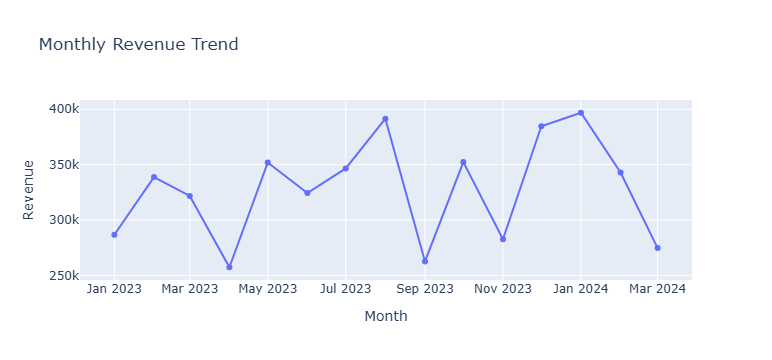

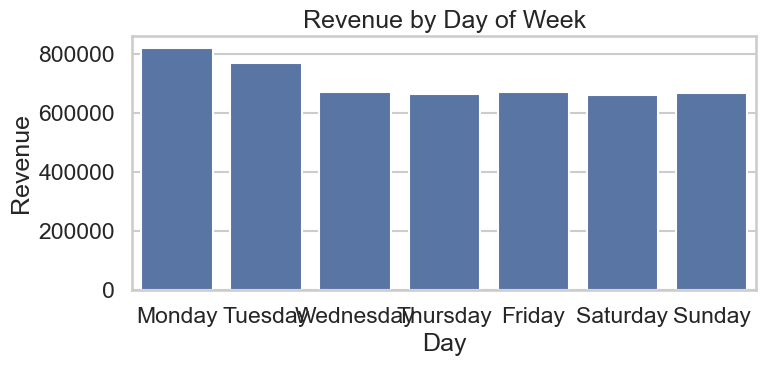

,product_category,revenue,orders,avg_order_value
2,Electronics,2328806.81,624,3732.062196
5,Home & Garden,908348.86,621,1462.719581
6,Sports,754563.56,667,1131.279700
3,Fashion,375214.93,622,603.239437
7,Toys,223142.48,610,365.807344
0,Beauty,156584.74,621,252.149340
4,Food,96138.67,619,155.312876
1,Books,72744.52,616,118.091753


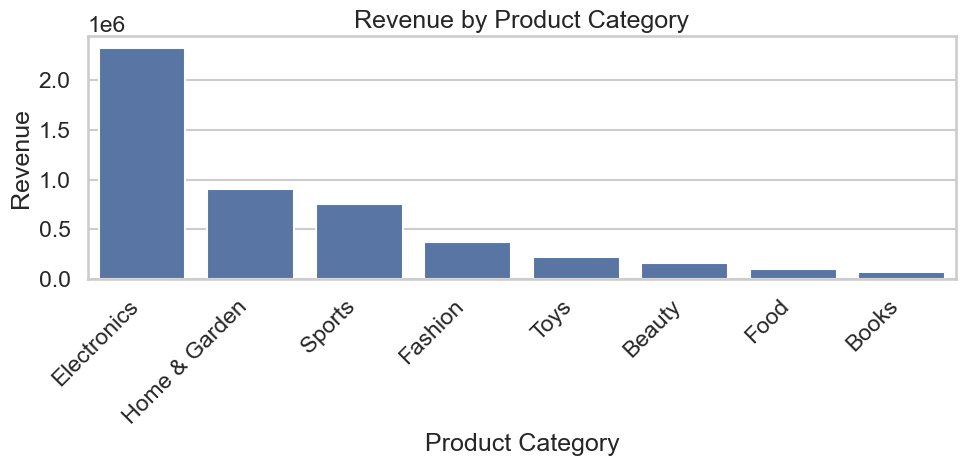

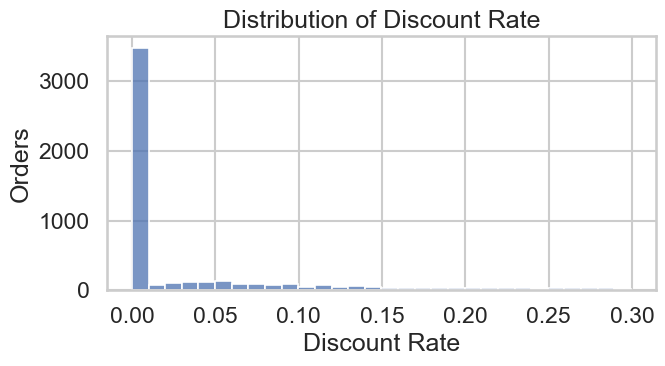

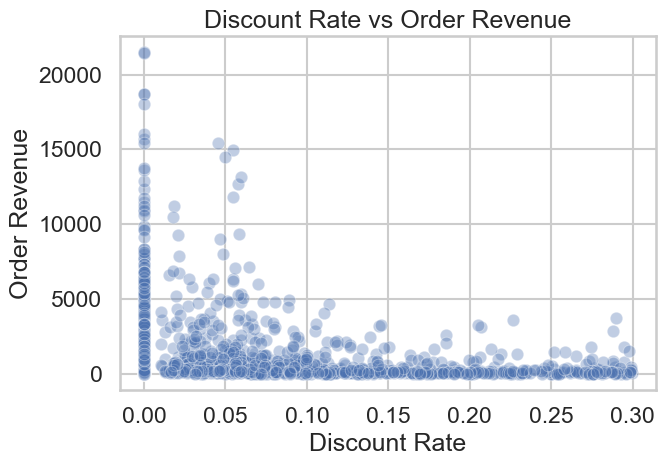

In [74]:
# Monthly revenue trend
if 'order_month' in df and 'total_amount' in df:
    monthly_rev = df.groupby('order_month', as_index=False)['total_amount'].sum()
    fig = px.line(monthly_rev, x='order_month', y='total_amount', title='Monthly Revenue Trend', markers=True)
    fig.update_layout(xaxis_title='Month', yaxis_title='Revenue')
    fig.show()

# Revenue by day of week
if 'order_day' in df and 'total_amount' in df:
    day_rev = df.groupby('order_day', as_index=False)['total_amount'].sum()
    order_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    day_rev['order_day'] = pd.Categorical(day_rev['order_day'], categories=order_day, ordered=True)
    day_rev = day_rev.sort_values('order_day')
    plt.figure(figsize=(8,4))
    sns.barplot(data=day_rev, x='order_day', y='total_amount')
    plt.title('Revenue by Day of Week'); plt.xlabel('Day'); plt.ylabel('Revenue')
    plt.tight_layout(); plt.show()

# Product category performance
if 'product_category' in df and 'total_amount' in df:
    cat_perf = df.groupby('product_category', as_index=False).agg(
        revenue=('total_amount','sum'),
        orders=('order_id','nunique'),
        avg_order_value=('total_amount','mean')
    ).sort_values('revenue', ascending=False)
    display(cat_perf.head(10))

    plt.figure(figsize=(10,5))
    sns.barplot(data=cat_perf, x='product_category', y='revenue', order=cat_perf['product_category'])
    plt.xticks(rotation=45, ha='right')
    plt.title('Revenue by Product Category'); plt.ylabel('Revenue'); plt.xlabel('Product Category')
    plt.tight_layout(); plt.show()

# Impact of discounts (distribution and relation)
if 'discount_rate' in df and 'total_amount' in df:
    plt.figure(figsize=(7,4))
    sns.histplot(df['discount_rate'], bins=30)
    plt.title('Distribution of Discount Rate'); plt.xlabel('Discount Rate'); plt.ylabel('Orders'); plt.tight_layout(); plt.show()

    samp = df.sample(min(3000, len(df)), random_state=42)
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=samp, x='discount_rate', y='total_amount', alpha=0.35)
    plt.title('Discount Rate vs Order Revenue'); plt.xlabel('Discount Rate'); plt.ylabel('Order Revenue')
    plt.tight_layout(); plt.show()


### **Behavioral analysis**

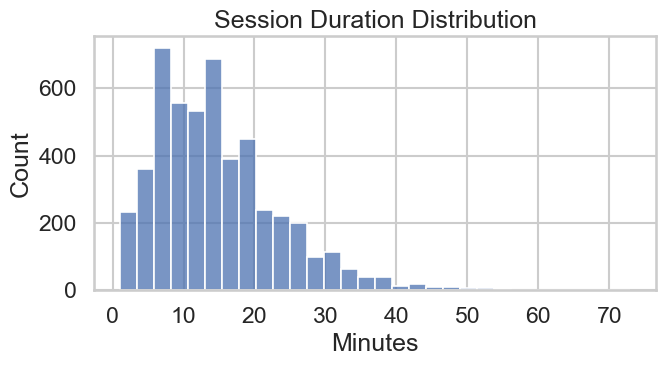

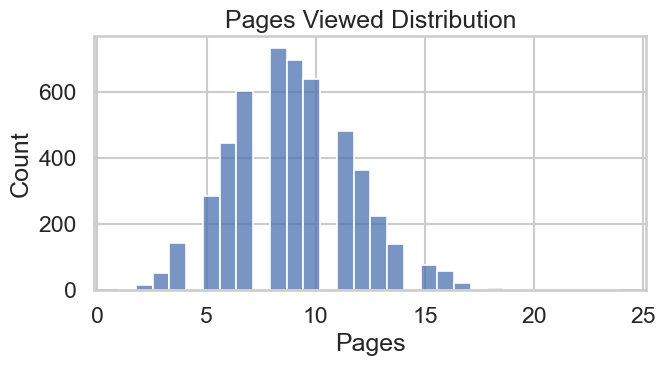

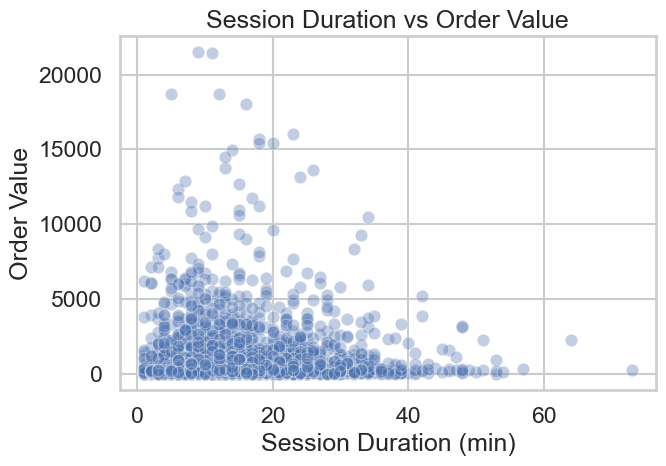

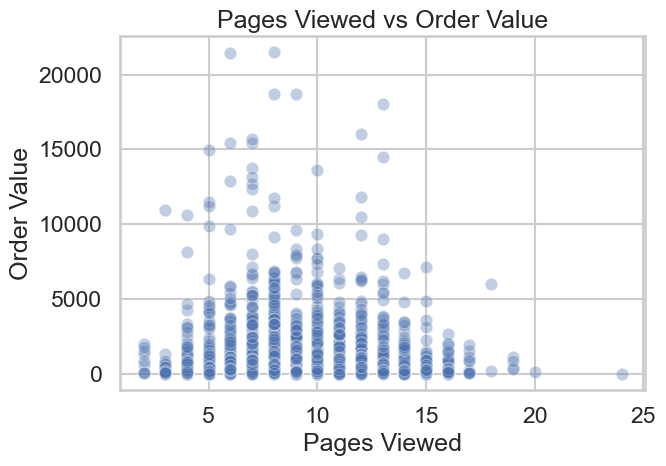

,is_returning_customer,orders,revenue,avg_order_value
0,False,2010,1967523.73,978.867527
1,True,2990,2948020.84,985.960147


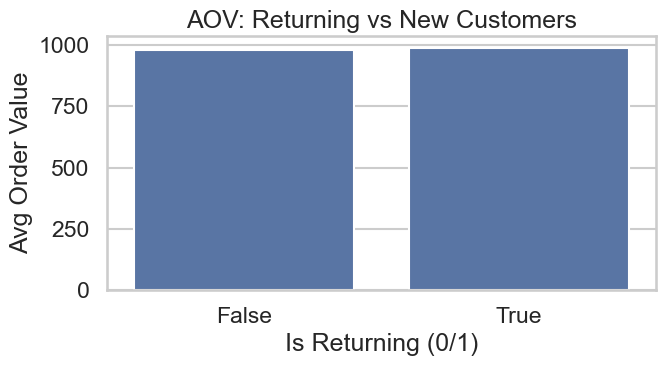

In [71]:
# Distributions: session duration & pages viewed
if 'session_duration' in df:
    plt.figure(figsize=(7,4))
    sns.histplot(df['session_duration'].dropna(), bins=30)
    plt.title('Session Duration Distribution'); plt.xlabel('Minutes'); plt.ylabel('Count'); plt.tight_layout(); plt.show()

if 'pages_viewed' in df:
    plt.figure(figsize=(7,4))
    sns.histplot(df['pages_viewed'].dropna(), bins=30)
    plt.title('Pages Viewed Distribution'); plt.xlabel('Pages'); plt.ylabel('Count'); plt.tight_layout(); plt.show()

# Relation with revenue
if set(['session_duration','total_amount']).issubset(df.columns):
    samp = df.sample(min(3000, len(df)), random_state=42)
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=samp, x='session_duration', y='total_amount', alpha=0.35)
    plt.title('Session Duration vs Order Value'); plt.xlabel('Session Duration (min)'); plt.ylabel('Order Value')
    plt.tight_layout(); plt.show()

if set(['pages_viewed','total_amount']).issubset(df.columns):
    samp = df.sample(min(3000, len(df)), random_state=42)
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=samp, x='pages_viewed', y='total_amount', alpha=0.35)
    plt.title('Pages Viewed vs Order Value'); plt.xlabel('Pages Viewed'); plt.ylabel('Order Value')
    plt.tight_layout(); plt.show()

# Returning vs new customers
if set(['is_returning_customer','total_amount']).issubset(df.columns):
    ret_summary = df.groupby('is_returning_customer', as_index=False).agg(
        orders=('order_id','nunique'),
        revenue=('total_amount','sum'),
        avg_order_value=('total_amount','mean')
    )
    display(ret_summary)
    plt.figure(figsize=(7,4))
    sns.barplot(data=ret_summary, x='is_returning_customer', y='avg_order_value')
    plt.title('AOV: Returning vs New Customers'); plt.xlabel('Is Returning (0/1)'); plt.ylabel('Avg Order Value')
    plt.tight_layout(); plt.show()


### **Payment and device trends**

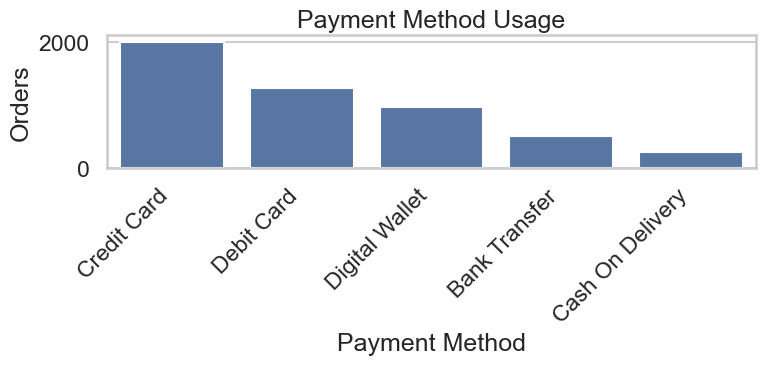

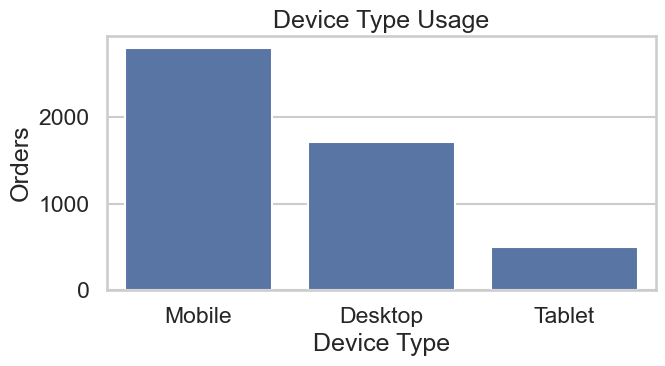

payment_method,Bank Transfer,Cash On Delivery,Credit Card,Debit Card,Digital Wallet
device_type,,,,,
Desktop,8.9,5.1,39.6,25.7,20.6
Mobile,11.0,4.6,39.9,25.5,19.0
Tablet,10.1,6.3,44.1,22.9,16.6


In [76]:
# Payment method distribution
if 'payment_method' in df:
    pay_counts = df['payment_method'].value_counts().reset_index()
    pay_counts.columns = ['payment_method','orders']
    plt.figure(figsize=(8,4))
    sns.barplot(data=pay_counts, x='payment_method', y='orders', order=pay_counts['payment_method'])
    plt.title('Payment Method Usage'); plt.xlabel('Payment Method'); plt.ylabel('Orders')
    plt.xticks(rotation=45, ha='right'); plt.tight_layout(); plt.show()

# Device type distribution
if 'device_type' in df:
    dev_counts = df['device_type'].value_counts().reset_index()
    dev_counts.columns = ['device_type','orders']
    plt.figure(figsize=(7,4))
    sns.barplot(data=dev_counts, x='device_type', y='orders', order=dev_counts['device_type'])
    plt.title('Device Type Usage'); plt.xlabel('Device Type'); plt.ylabel('Orders')
    plt.tight_layout(); plt.show()

# Cross: device vs payment
if set(['device_type','payment_method']).issubset(df.columns):
    cross = pd.crosstab(df['device_type'], df['payment_method'], normalize='index') * 100
    display(cross.round(1))


### **Delivery and satisfaction**

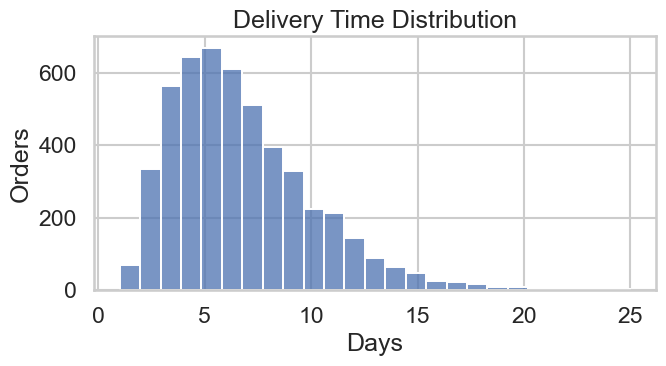

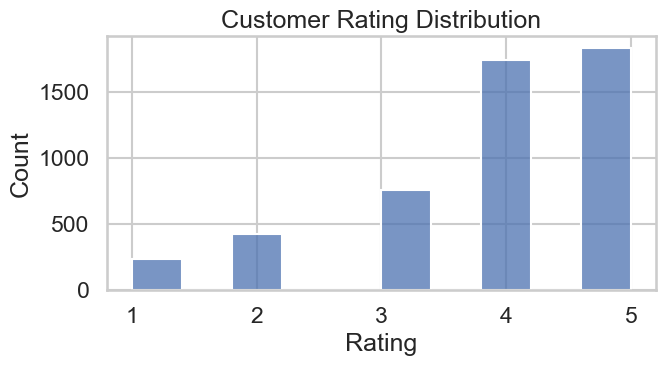

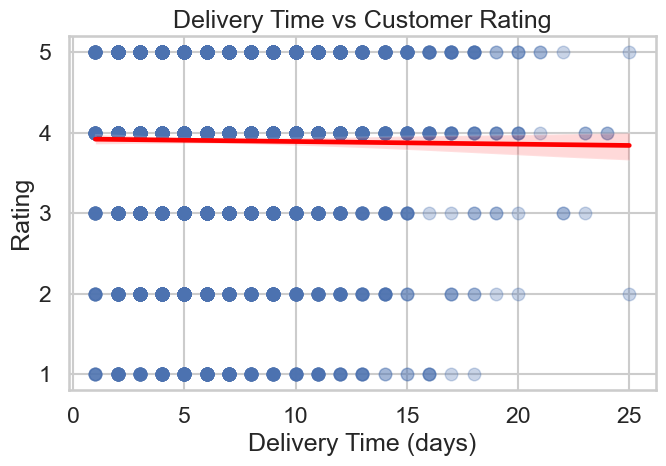

,product_category,customer_rating
1,Books,3.967532
5,Home & Garden,3.938808
2,Electronics,3.919872
0,Beauty,3.908213
6,Sports,3.898051
7,Toys,3.883607
3,Fashion,3.876206
4,Food,3.830372


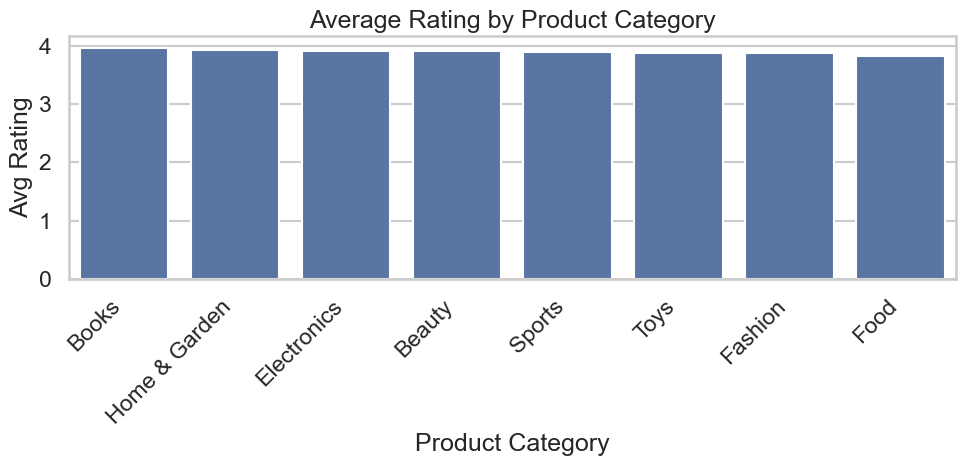

In [77]:
# Delivery time distribution
if 'delivery_time_days' in df:
    plt.figure(figsize=(7,4))
    sns.histplot(df['delivery_time_days'].dropna(), bins=25)
    plt.title('Delivery Time Distribution'); plt.xlabel('Days'); plt.ylabel('Orders'); plt.tight_layout(); plt.show()

# Customer rating distribution
if 'customer_rating' in df:
    plt.figure(figsize=(7,4))
    sns.histplot(df['customer_rating'].dropna(), bins=10)
    plt.title('Customer Rating Distribution'); plt.xlabel('Rating'); plt.ylabel('Count'); plt.tight_layout(); plt.show()

# Delivery vs rating relation
if set(['delivery_time_days','customer_rating']).issubset(df.columns):
    plt.figure(figsize=(7,5))
    sns.regplot(data=df, x='delivery_time_days', y='customer_rating', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title('Delivery Time vs Customer Rating'); plt.xlabel('Delivery Time (days)'); plt.ylabel('Rating')
    plt.tight_layout(); plt.show()

# Average rating by category
if set(['product_category','customer_rating']).issubset(df.columns):
    cat_rating = df.groupby('product_category', as_index=False)['customer_rating'].mean().sort_values('customer_rating', ascending=False)
    display(cat_rating.head(10))
    plt.figure(figsize=(10,5))
    sns.barplot(data=cat_rating, x='product_category', y='customer_rating', order=cat_rating['product_category'])
    plt.xticks(rotation=45, ha='right')
    plt.title('Average Rating by Product Category'); plt.xlabel('Product Category'); plt.ylabel('Avg Rating')
    plt.tight_layout(); plt.show()


### **Correlation overview (numeric)**

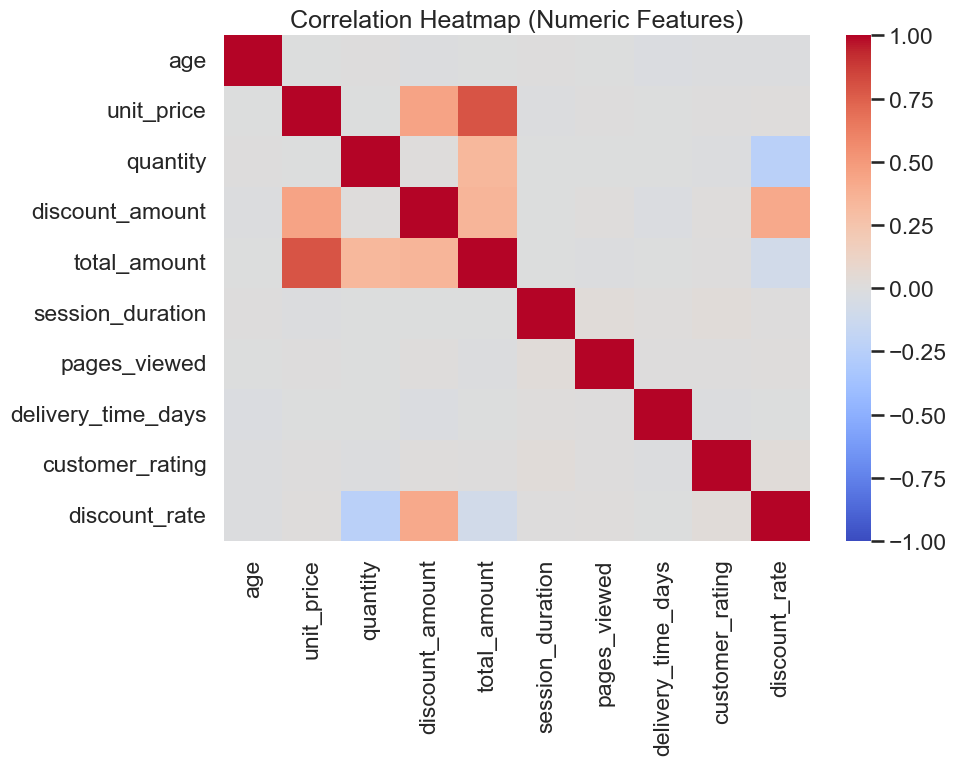

Top correlations with total_amount:


,corr
total_amount,1.000000
unit_price,0.791073
discount_amount,0.347578
quantity,0.329053
customer_rating,0.005742
session_duration,-0.004119
age,-0.004473
delivery_time_days,-0.005893
pages_viewed,-0.011831
discount_rate,-0.088912


In [78]:
num_df = df.select_dtypes(include=[np.number])
if len(num_df.columns) > 0:
    corr = num_df.corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap (Numeric Features)')
    plt.tight_layout(); plt.show()

    # Top correlations with revenue
    if 'total_amount' in corr.index:
        print("Top correlations with total_amount:")
        display(corr['total_amount'].sort_values(ascending=False).to_frame('corr').head(10))


### **Compact KPI visuals (optional, portfolio polish)**

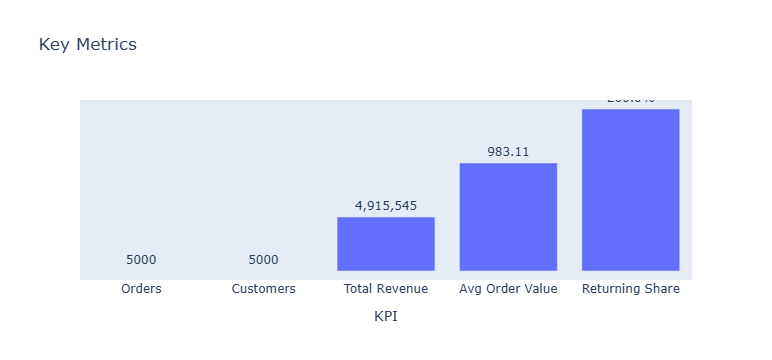

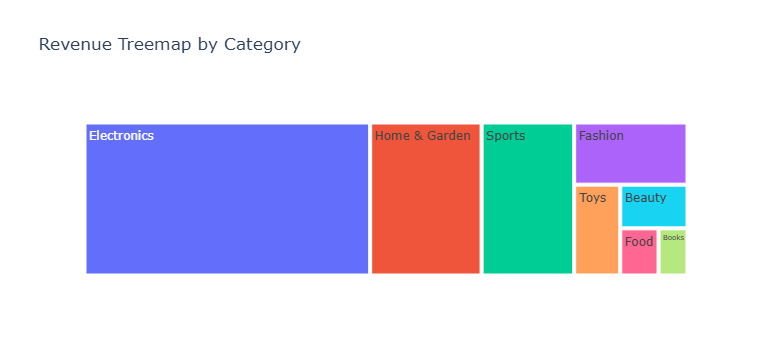

In [79]:
# KPI bar (uses strings for readability)
kpi_df = pd.DataFrame({
    'KPI': ['Orders','Customers','Total Revenue','Avg Order Value','Returning Share'],
    'Value': [
        kpis.get('orders', np.nan),
        kpis.get('customers', np.nan),
        f"{kpis.get('total_revenue', np.nan):,.0f}" if pd.notnull(kpis.get('total_revenue')) else np.nan,
        f"{kpis.get('avg_order_value', np.nan):,.2f}" if pd.notnull(kpis.get('avg_order_value')) else np.nan,
        f"{kpis.get('returning_share', np.nan)*100:.1f}%" if pd.notnull(kpis.get('returning_share')) else np.nan
    ]
})
fig = px.bar(kpi_df, x='KPI', y='Value', title='Key Metrics', text='Value')
fig.update_traces(textposition='outside')
fig.update_layout(yaxis={'visible': False, 'showticklabels': False})
fig.show()

# Category treemap
if set(['product_category','total_amount']).issubset(df.columns):
    fig = px.treemap(df, path=['product_category'], values='total_amount', title='Revenue Treemap by Category')
    fig.show()


### **Insight summary (auto-generated text)**

In [80]:
insights = []

# Top category and city
if 'product_category' in df and 'total_amount' in df:
    top_cat = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)
    if len(top_cat) > 0:
        insights.append(f"Top revenue category: {top_cat.index[0]} ({top_cat.iloc[0]:,.0f}).")

if 'city' in df and 'total_amount' in df:
    top_city = df.groupby('city')['total_amount'].sum().sort_values(ascending=False)
    if len(top_city) > 0:
        insights.append(f"Top revenue city: {top_city.index[0]} ({top_city.iloc[0]:,.0f}).")

# Returning customers
if set(['is_returning_customer','total_amount']).issubset(df.columns):
    ret = df.groupby('is_returning_customer')['total_amount'].mean()
    if 1 in ret.index and 0 in ret.index:
        lift = (ret[1] - ret[0]) / ret[0] if ret[0] != 0 else np.nan
        insights.append(f"Returning customers have {ret[1]:.2f} AOV vs {ret[0]:.2f} for new (lift: {lift*100:.1f}%).")

# Delivery vs rating quick correlation
if set(['delivery_time_days','customer_rating']).issubset(df.columns):
    corr_dr = df[['delivery_time_days','customer_rating']].corr().iloc[0,1]
    insights.append(f"Delivery time vs rating correlation: {corr_dr:.2f} (negative suggests faster delivery → higher rating).")

# Behavior vs revenue correlations
beh_cols = [c for c in ['session_duration','pages_viewed','discount_rate'] if c in df.columns]
if 'total_amount' in df and beh_cols:
    corr_beh = df[['total_amount'] + beh_cols].corr()['total_amount'].drop('total_amount')
    for k, v in corr_beh.items():
        insights.append(f"Correlation with revenue — {k}: {v:.2f}.")

print("\nINSIGHTS SUMMARY:")
for i in insights:
    print("-", i)



INSIGHTS SUMMARY:
- Top revenue category: Electronics (2,328,807).
- Top revenue city: Istanbul (1,334,123).
- Delivery time vs rating correlation: -0.01 (negative suggests faster delivery → higher rating).
- Correlation with revenue — session_duration: -0.00.
- Correlation with revenue — pages_viewed: -0.01.
- Correlation with revenue — discount_rate: -0.09.


### **Conclusions and recommendations**

- Focus on top-performing product categories and cities to maximize ROI from marketing and inventory allocation.
- Optimize discount strategies: moderate discounts may convert without eroding margins; test tiered promotions per category.
- Returning customers show higher average order value; strengthen loyalty programs and personalized offers.
- Enhance on-site engagement (recommendations, search, bundles) to increase session depth and order value.
- Streamline logistics in high-revenue regions; faster delivery aligns with better customer ratings and likely repeat purchases.
- Tailor checkout for dominant payment methods and ensure a smooth mobile experience given device usage patterns.